# Método das Splines

Sabe-se que os demais métodos de interpolação existentes, embora funcionais, sempre exigem um pouco de análise dos pontos de interesse para realizar uma interpolação mais condizente com nossas expectativas. Para evitar isso, criou-se o método das splines.

Esse modelo possui algumas propriedades, sendo essas pautadas:

Considere a função f(x) tabela nos pontos $x_{0} < x_{1} < ... < x_{n}$. Uma função $S_{p}(x)$ é denominada <b>spline de grau p</b> com nós nos pontos $x_{i}$, i = 1, 2, ..., n se esse satisfaz as seguintes condições:

- Em cada subintervalo $[x_{i}, x_{i+1}]$, i = 0, 1, ..., (n-1), $S_{p}(x)$ é um polinômio de grau p: $S_{p}(x)$;
- $S_{p}(x)$ é <b>contínua</b> e tem derivada contínua até ordem (p-1) em [a,b];
- Se $S_{p}(x) = f(x_{i})$ i = 0, 1, 2, ..., n, então será denominada <b>Spline Interpolante</b>

Dessa maneira, podemos separar tais splines nos seguintes perfis:

<h5>Spline Linear Interpolante</h5>

É tal que

$s_{i} = f(x_{i-1})\frac{x_{i} - x}{x_{i} - x_{i-1}} + f(x_{i})\frac{x - x_{i-1}}{x_{i} - x_{i-1}}, \forall x \in [x_{i-1}, x_{i}]$

Passando isso para python:

In [34]:
def splineLinear(xi:float, xiant: float, fxi: float, fxiant: float, x_guess: float) -> float:
  '''Função que realiza a Spline Linear de maneira manual e retorna o cálculo de acordo com os pontos dados'''
  si = (fxiant*(xi-x_guess)/(xi-xiant)) + (fxi*(x_guess-xiant)/(xi-xiant))
  return si

def SLM(xi:float, xiant:float, fxi:float, fxiant: float,t: list) -> list:
  '''Função que armazena os resultados da Spline Linear em uma lista e a retorna, isso com base na entrada
  de uma lista de pontos f(x) de interesse'''
  yt = []
  for i in t:
    yt.append(splineLinear(xi,xiant,fxi,fxiant,i))
  return yt


x_array = [0, 10, 15, 20, 22.5, 30] # Insira os valores de xi conhecidos aqui

fx_array = [0, 227.04, 362.78, 517.35, 602.97, 901.67] # Insira os respectivos valores de f(xi) conhecidos aqui

# Recebendo os pontos x de interesse do usuário
data = list((input('Digite os valores que deseja procurar no spline do intervalo escolhido na função: ')).split(' '))

# Transformando o input do usuário em uma lista de pontos flutuante por meio de list comprehesion
data_int_list = [float(data[i]) for i in range(len(data))]

# Recebendo os resultados da Spline Linear
k = SLM(x_array[3], x_array[2], fx_array[3], fx_array[2], data_int_list)

# Imprimindo na tela o resultado dos pontos de interesse
print('Resultado da interpolação por Spline Linear')
for i, value in enumerate(data_int_list):
    print(f'Valor em f({value}): {round(k[i], 3)}')


Valor em f(15.0): 362.78
Valor em f(16.0): 393.694
Valor em f(17.0): 424.608
Valor em f(18.0): 455.522
Valor em f(19.0): 486.436
Valor em f(20.0): 517.35


Entretanto, note que por ser linear, a derivada da função Spline geral ($S_{p}(x)$) não é contínua em toda a função. Logo, para isso, existem também:

<h5> Spline Quadrática Interpolante </h5>
Não apresentará problemas em relação a derivada à primeira, porém, apresentará em relação à segunda. Além disso, sua curvatura pode trocar nos nós. Dessa maneira, a spline mais usual será:

<h5> Spline Cúbica Interpolante </h5>

A função Spline cúbica interpolante de f(x), $S_{3}(x)$, nos nós $x_{0}, x_{1}, ..., x_{n}$, é escrita em cada subintervalo $[x_{k-1}, x_{k}], k = 1, 2, ..., n$ com n polinômios $s_{k}$ de grau 3.

Para demonstrar tais propriedade, utilizaremos a biblioteca SciPy. Note:

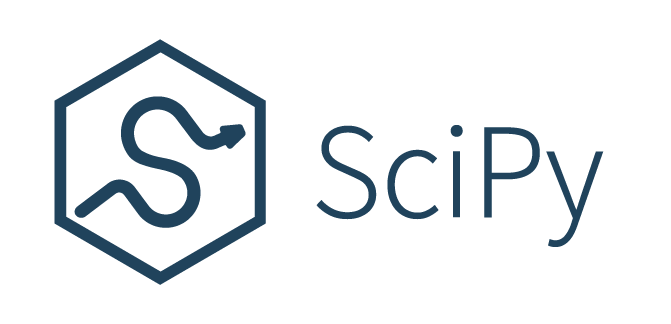
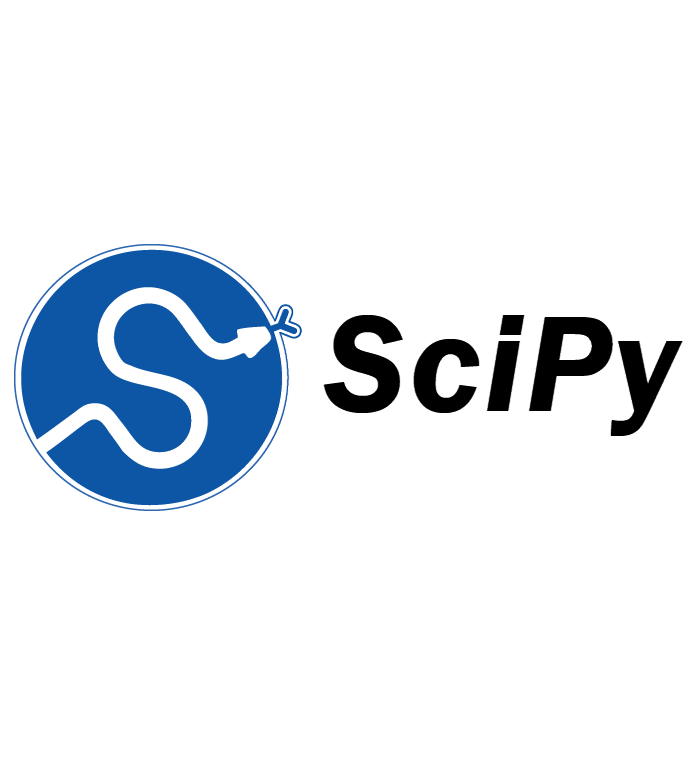

In [35]:
from scipy.interpolate import interp1d

# Para quadrática

print('Resultado da interpolação por Spline Quadrática')
s_quadratic = interp1d(x_array, fx_array, kind='quadratic') # Criação de uma classe de spline quadrática

k = s_quadratic(data_int_list) # Aplicando a classe de spline quadrática nos pontos que queremos encontrar

for i, value in enumerate(data_int_list):
    print(f'Valor em f({value}): {round(k[i], 3)}')

print('\n')
# Já para cúbica

s_cubic = interp1d(x_array, fx_array, kind='cubic') # Criação de uma classe de spline cúbica

k = s_cubic(data_int_list) # Aplicando a classe de spline cúbica nos pontos que queremos encontrar

print('Resultado da interpolação por Spline Cúbica')
for i, value in enumerate(data_int_list):
    print(f'Valor em f({value}): {round(k[i], 3)}')

Resultado da interpolação por Spline Quadrática
Valor em f(15.0): 362.78
Valor em f(16.0): 392.093
Valor em f(17.0): 422.165
Valor em f(18.0): 453.013
Valor em f(19.0): 484.736
Valor em f(20.0): 517.35


Resultado da interpolação por Spline Cúbica
Valor em f(15.0): 362.78
Valor em f(16.0): 392.071
Valor em f(17.0): 422.139
Valor em f(18.0): 453.019
Valor em f(19.0): 484.745
Valor em f(20.0): 517.35
